<a href="https://colab.research.google.com/github/SydneyTsuma/Autolib_Project/blob/main/AUTOLIB_BLUE_CAR_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SECTION 1 : Describing Data

##Import Libraries

In [6]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

##Reading Files

In [7]:
# Reading Autolib csv file

Autolib = pd.read_csv('/content/autolib_daily_events_postal_code (1).csv')
Autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


## Describe the data

In [8]:
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [9]:
Autolib.shape

(16085, 13)

In [10]:
Autolib.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

unique column identifier absent

##Cleaning the Data

###Data Uniformity

In [11]:
# Dealing with anomalies
Autolib.columns = Autolib.columns.str.replace(' ', '_')


###Identifying Outliers

In [12]:
# Filter dataset to specify outliers  to be viewed in dataset 
Weekends = Autolib[Autolib['day_type']=='weekend'] 
Weekends

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,2,2,15,15,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,2,2,12,12,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,2,2,25,25,41,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16068,95880,6/3/2018,1440,6,weekend,36,33,1,1,2,2,0,0
16074,95880,6/9/2018,1440,5,weekend,15,15,0,0,1,2,0,0
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


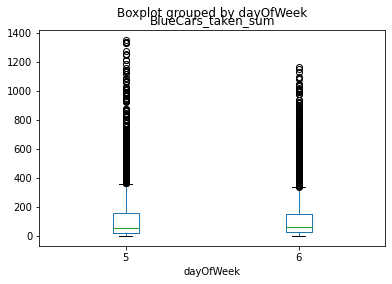

In [13]:
Weekend_Visual= Weekends.boxplot(column =['BlueCars_taken_sum'], by ='dayOfWeek', grid = False)
Weekend_Visual

In [14]:
# Drop outliers 

# Checking for outliers using IQR Scores
Q1 = Weekends.quantile(0.25)
Q3 = Weekends.quantile(0.75)
IQR = Q3 - Q1
outlier = (Weekends< (Q1 - 1.5 * IQR)) |(Weekends > (Q3 + 1.5 * IQR))
outlier.sum()

# Removing outliers based on the IQR range 
#_Weekend_ = Weekends[~((Weekends < (Q1 - 1.5 * IQR)) | (Weekends> (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset

# print(Weekends.shape)

BlueCars_returned_sum      659
BlueCars_taken_sum         653
Postal_code               1100
Slots_freed_sum            892
Slots_taken_sum            894
Utilib_14_returned_sum     497
Utilib_14_taken_sum        532
Utilib_returned_sum        490
Utilib_taken_sum           491
date                         0
dayOfWeek                    0
day_type                     0
n_daily_data_points        924
dtype: int64

In [15]:
# Dropping unrequired columns
Weekends.drop(["Utilib_taken_sum","Utilib_returned_sum","Utilib_14_taken_sum","Utilib_14_returned_sum","Slots_freed_sum","Slots_taken_sum"],axis=1,inplace=True)
Weekends


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
5,75001,1/6/2018,1437,5,weekend,187,185
6,75001,1/7/2018,1440,6,weekend,180,180
12,75001,1/13/2018,1440,5,weekend,224,223
13,75001,1/14/2018,1440,6,weekend,193,193
19,75001,1/20/2018,1439,5,weekend,217,217
...,...,...,...,...,...,...,...
16068,95880,6/3/2018,1440,6,weekend,36,33
16074,95880,6/9/2018,1440,5,weekend,15,15
16075,95880,6/10/2018,1440,6,weekend,34,32
16081,95880,6/16/2018,1440,5,weekend,19,19


In [16]:
# Converting date type from object to date type
Weekends['date']=pd.to_datetime(Weekends['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
Weekends.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4541 entries, 5 to 16082
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Postal_code            4541 non-null   int64         
 1   date                   4541 non-null   datetime64[ns]
 2   n_daily_data_points    4541 non-null   int64         
 3   dayOfWeek              4541 non-null   int64         
 4   day_type               4541 non-null   object        
 5   BlueCars_taken_sum     4541 non-null   int64         
 6   BlueCars_returned_sum  4541 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 283.8+ KB


#SECTION 2 : Exploratory Data Analysis

##Univariate Analysis

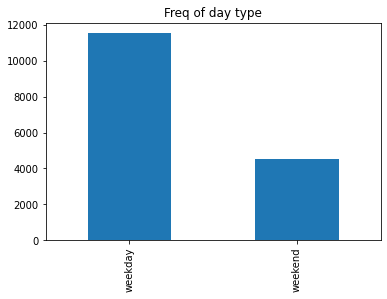

In [18]:
# Frequency of day type plot
Autolib ['day_type'].value_counts().plot.bar(title='Freq of day type')

##Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

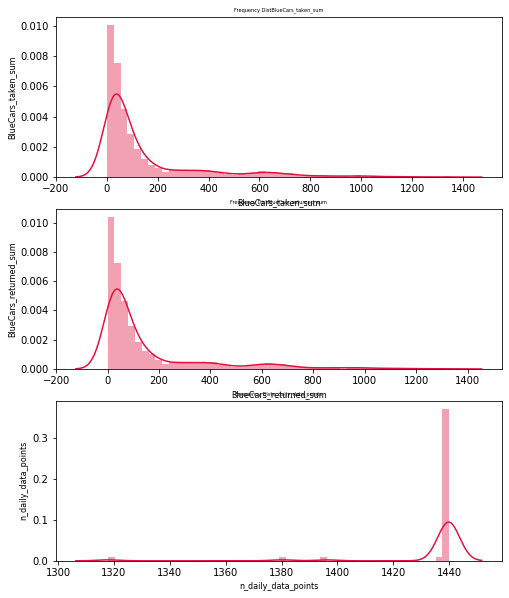

In [19]:
# Frequency distribution Plot
col_names = ['BlueCars_taken_sum', 'BlueCars_returned_sum','n_daily_data_points']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.distplot(Weekends[col_val], hist=True, ax=ax[i], color='crimson')
  ax[i].set_title('Frequency Dist' + col_val, color='black',fontsize=5,)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel(col_val, fontsize=8)

plt.show()

In [20]:
# The total number of blue cars in each postal code
Postal_code=Weekends.pivot_table(values=['BlueCars_taken_sum'],index=['Postal_code'],aggfunc='sum').sort_values(by='BlueCars_taken_sum',ascending=0)
Postal_code.head(20)

,BlueCars_taken_sum
Postal_code,
75015,47202
75016,38998
75017,36565
75019,30009
75013,28931
75012,28227
75014,26044
75020,26034
75011,25572


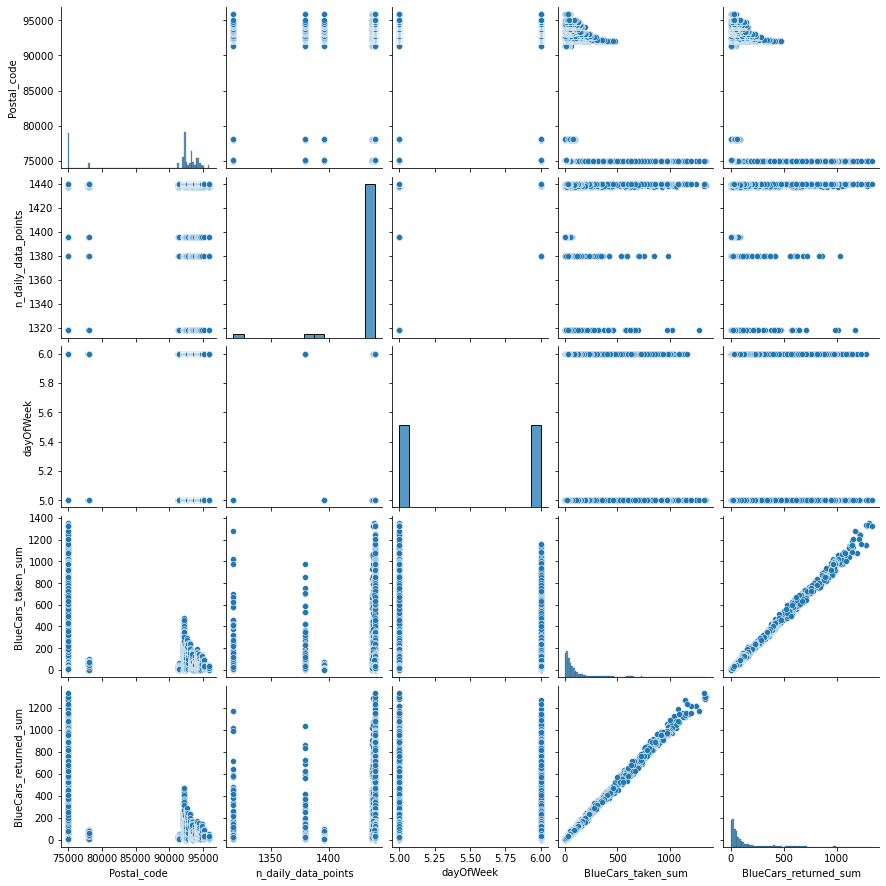

In [21]:
# Generate a pair plot for the dataset
sns.pairplot(Weekends)

In [22]:
# Calculeate pearsons coefficient to confirm results
Weekends.corr()

,Postal_code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
Postal_code,1.000000,0.001558,0.000809,-0.713358,-0.714426
n_daily_data_points,0.001558,1.000000,0.115753,0.023170,0.024409
dayOfWeek,0.000809,0.115753,1.000000,-0.023001,-0.013783
BlueCars_taken_sum,-0.713358,0.023170,-0.023001,1.000000,0.998578
BlueCars_returned_sum,-0.714426,0.024409,-0.013783,0.998578,1.000000


There is a high relationship between the  Blue cars taken and Blue cars returned 0.998578

#SECTION 3 : Hypothesis Testing


Hypothesis: The number of bluecars taken from postal code 75 015 is greater than the blue car taken from postal code 75 009 over the weekends



## Stating the null hypothesis

H0 : The Number of bluecars taken in 75015 is greater than bluecars taken in 75009 over the weekends

H1 : The number of bluecars taken in 75015 is not greater than bluecars taken on 75009 over the weekends

Selecting the statistical test: sample z-test

Signifance level, alpha = 0.05

 



In [39]:
# Sampling our data
Postal_Code_75015=Weekends[Weekends['Postal_code']==75015]
Postal_Code_75009=Weekends[Weekends['Postal_code']==75009]
print(Postal_Code_75015.head(5))
print(Postal_Code_75009.head(5))

      Postal_code       date  ...  BlueCars_taken_sum  BlueCars_returned_sum
2189        75015 2018-01-06  ...                1061                   1015
2190        75015 2018-01-07  ...                 913                    971
2196        75015 2018-01-13  ...                1255                   1211
2197        75015 2018-01-14  ...                1097                   1135
2203        75015 2018-01-20  ...                1352                   1300

[5 rows x 7 columns]
      Postal_code       date  ...  BlueCars_taken_sum  BlueCars_returned_sum
1253        75009 2018-01-06  ...                 433                    455
1254        75009 2018-01-07  ...                 394                    398
1260        75009 2018-01-13  ...                 524                    521
1261        75009 2018-01-14  ...                 397                    423
1267        75009 2018-01-20  ...                 503                    517

[5 rows x 7 columns]


Testing the required conditions to help us in performing a Z test:

The sample size is greater than 30

The two samples are independent

The samples are normally distributed

The sample was randomly sampled from the population.

From the above conditions we can see from the above that our samples were sampled using stratified Random sampling

The two samples are independent.



In [24]:
# Sample size
print(Postal_Code_75015.shape)
print(Postal_Code_75009.shape)

(44, 7)
(44, 7)


In [44]:
# Testing the normality of the first samples
from scipy.stats import shapiro
statistc,p_value=shapiro(Postal_Code_75015['BlueCars_taken_sum'])
if p_value > 0.05:
  print('Our sample data is normally distributed')
else:
  print('Our sample data is not normally distributed')
print(p_value)

Our sample data is normally distributed
6.519343855870829e-07


In [43]:
# Testing the normality of the first samples
from scipy.stats import shapiro
statistc,p_value=shapiro(Postal_Code_75009['BlueCars_taken_sum'])
if p_value > 0.05:
  print('Our sample data is normally distributed')
else:
  print('Our sample data is not normally distributed')
print(p_value)

Our sample data is normally distributed
8.744467049837112e-05


In [28]:
print("Our data has satisfied our assumptions we need, testing our hypothesis")

Our data has satisfied our assumptions we need, testing our hypothesis


In [41]:
# z-test
from scipy import stats
from statsmodels.stats import weightstats as stest
ztest,p_value=stest.ztest(Postal_Code_75015['BlueCars_taken_sum'],Postal_Code_75009['BlueCars_taken_sum'])
if p_value > 0.05:
  print('Reject the null hypothesis thus the study is significant')
else:
  print('fail to reject the Null hypothesis')
print('pvalue:-',p_value)
print('z statistics:-',ztest)

fail to reject the Null hypothesis
pvalue:- 2.7260027859120197e-88
z statistics:- 19.92007169691216


#SECTION 4 : Conclusion

Since the pvalue is less than a=0.05 we fail to reject the null hypothesis signifying Postal station 75 015 has a higher number of Blue cars compared to 75 009

#SECTION 5 : Recommendation

Increase the number of blue cars to be borrowed at postal station 75 015